In [411]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [412]:
import missingno as msno

### Reading the data

In [413]:
df = pd.read_csv("housing.csv")

In [482]:
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))

#### Further data to be cleaned

1. sqft_living, sqft_lot, sqft_living15, sqft_lot15, bathrooms, bedrooms -> remove extreme values

**1. Removing outliers from sqft_living, sqft_living15, sqft_lot, sqft_lot15, bathrooms and bedrooms**

In [431]:
# Upper boundary for sqft_living
df2.describe().loc["75%","sqft_living"] + (df2.describe().loc["75%","sqft_living"] - df2.describe().loc["25%","sqft_living"])*1.5

4230.0

<Axes: xlabel='sqft_living', ylabel='Count'>

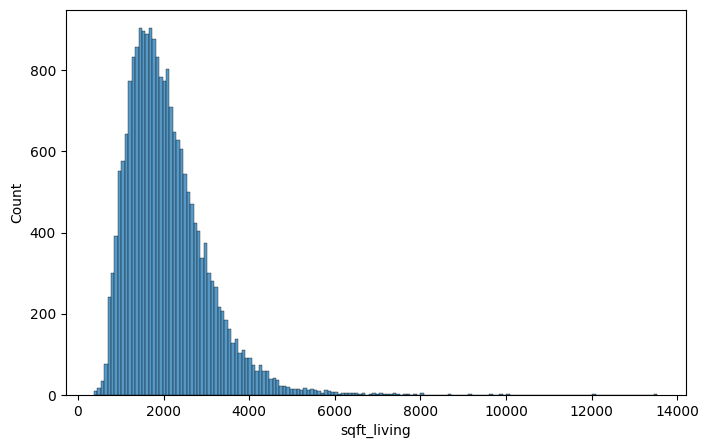

In [432]:
sns.histplot(data = df2, x = df2["sqft_living"])

In [433]:
# number of outliers for sqft_lot + percentage as part of the total dataset

print("Number of outliers: ", np.sum(df2["sqft_living"] > 4230.0))
print()
print("Percentage of total dataset: ", round((571 / len(df2["sqft_living"])*100),2), "%")

Number of outliers:  571

Percentage of total dataset:  2.64 %


<Axes: xlabel='sqft_lot', ylabel='sqft_living'>

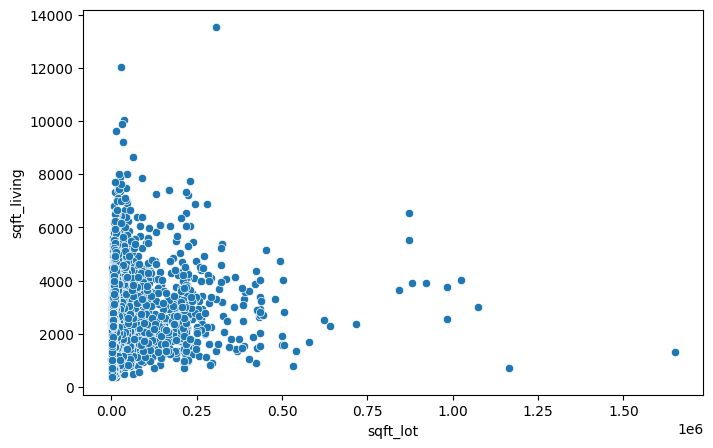

In [434]:
sns.scatterplot(data = df2, x = df2["sqft_lot"], y = df2["sqft_living"])

In [435]:
# Upper boundary for sqft_lot
df2.describe().loc["75%","sqft_lot"] + (df2.describe().loc["75%","sqft_lot"] - df2.describe().loc["25%","sqft_lot"])*1.5

19152.5

<Axes: xlabel='sqft_lot', ylabel='Count'>

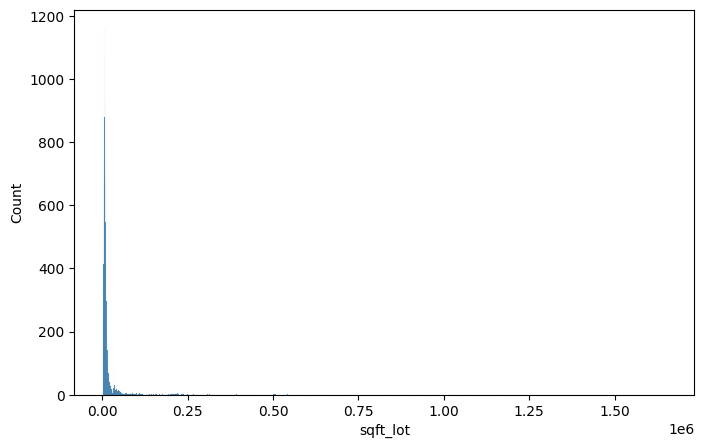

In [436]:
sns.histplot(data = df2, x = df2["sqft_lot"])

In [437]:
# number of outliers for sqft_lot + percentage as part of the total dataset

print("Number of outliers: ", np.sum(df2["sqft_lot"] > 19152.5))
print()
print("Percentage of total dataset: ", round((2419 / len(df2["sqft_lot"])*100),2), "%")

Number of outliers:  2419

Percentage of total dataset:  11.2 %


In [438]:
# higher outlier boundary

print("Number of outliers: ", np.sum(df2["sqft_lot"] > 30000))
print()
print("Percentage of total dataset: ", round((1685 / len(df2["sqft_lot"])*100),2),"%")

Number of outliers:  1685

Percentage of total dataset:  7.8 %


<Axes: xlabel='sqft_lot15', ylabel='Count'>

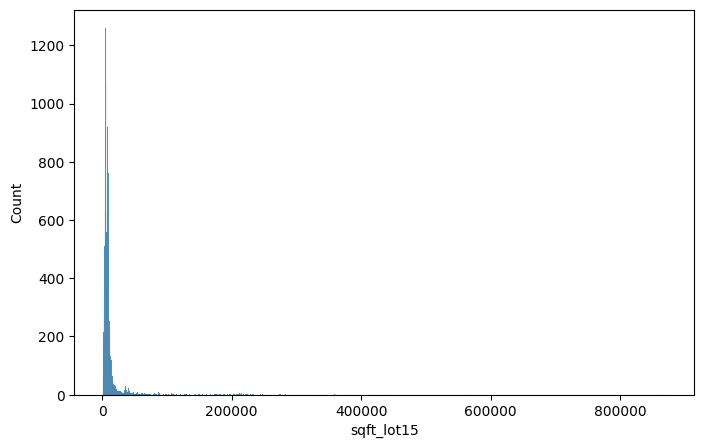

In [439]:
sns.histplot(data = df2, x = df2["sqft_lot15"])

In [440]:
# Upper boundary for sqft_lot15
df2.describe().loc["75%","sqft_lot15"] + (df2.describe().loc["75%","sqft_lot15"] - df2.describe().loc["25%","sqft_lot15"])*1.5

17557.5

In [441]:
# number of outliers for sqft_lot15 + percentage as part of the total dataset

print("Number of outliers: ", np.sum(df2["sqft_lot"] > 17557.5))
print()
print("Percentage of total dataset: ", round((2662 / len(df2["sqft_lot"])*100),2), "%")

Number of outliers:  2662

Percentage of total dataset:  12.33 %


In [442]:
# remove outliers sqft_living, sqft_lot and sqft_lot15

df3 = df2.query("sqft_living < 4230.0 and sqft_lot < 30000 and sqft_lot15 < 17557.5")

In [443]:
df3.describe()

,price,waterfront,sqft_living,sqft_lot,floors,bedrooms,bathrooms,yr_built,sqft_living15,sqft_lot15,zipcode,lat,long
count,18878.000,16762.000,18878.000,18878.000,18878.000,18878.000,18878.000,18878.000,18878.000,18878.000,18878.000,18878.000,18878.000
mean,497303.087,0.004,1944.712,7445.257,1.483,3.331,2.050,1969.907,1890.761,7150.889,98081.450,47.562,-122.229
std,270626.984,0.060,740.236,3938.459,0.544,0.912,0.712,30.060,599.834,3160.165,54.115,0.137,0.132
min,78000.000,0.000,370.000,520.000,1.000,1.000,0.500,1900.000,620.000,651.000,98001.000,47.156,-122.503
25%,312500.000,0.000,1385.500,4855.500,1.000,3.000,1.500,1950.000,1450.000,5000.000,98033.000,47.480,-122.336
50%,435000.000,0.000,1830.000,7200.000,1.000,3.000,2.000,1971.000,1770.000,7210.000,98074.000,47.573,-122.266
75%,609000.000,0.000,2400.000,9366.250,2.000,4.000,2.500,1997.000,2230.000,9000.000,98118.000,47.679,-122.153
max,3100000.000,1.000,4220.000,29735.000,3.500,33.000,7.500,2015.000,5790.000,17550.000,98199.000,47.778,-121.315


<Axes: xlabel='sqft_living', ylabel='Count'>

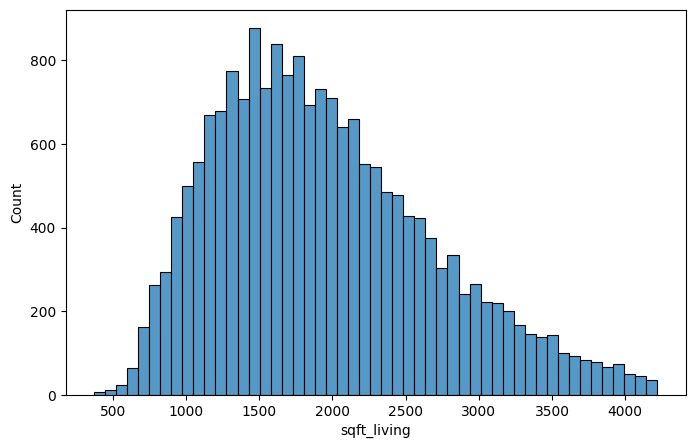

In [444]:
sns.histplot(data = df3, x = df3["sqft_living"])

<Axes: xlabel='sqft_lot', ylabel='Count'>

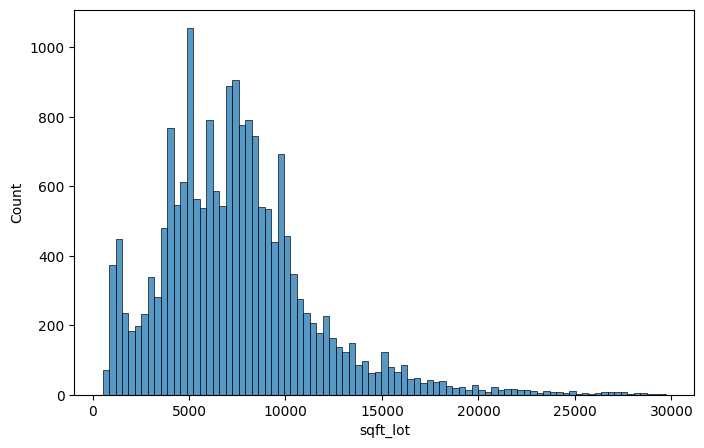

In [445]:
sns.histplot(data = df3, x = df3["sqft_lot"])

<Axes: xlabel='sqft_living15', ylabel='Count'>

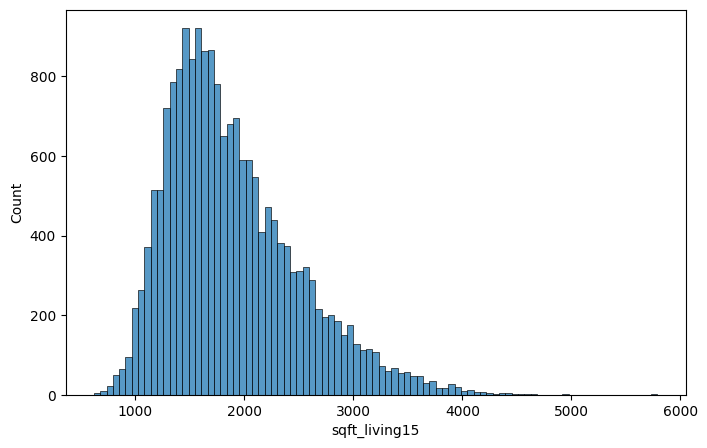

In [446]:
sns.histplot(data = df3, x = df3["sqft_living15"])

<Axes: xlabel='sqft_lot15', ylabel='Count'>

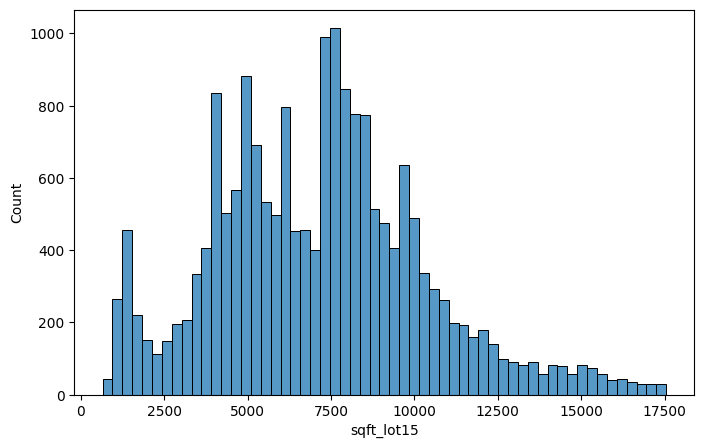

In [447]:
sns.histplot(data = df3, x = df3["sqft_lot15"])

<Axes: xlabel='sqft_lot', ylabel='sqft_living'>

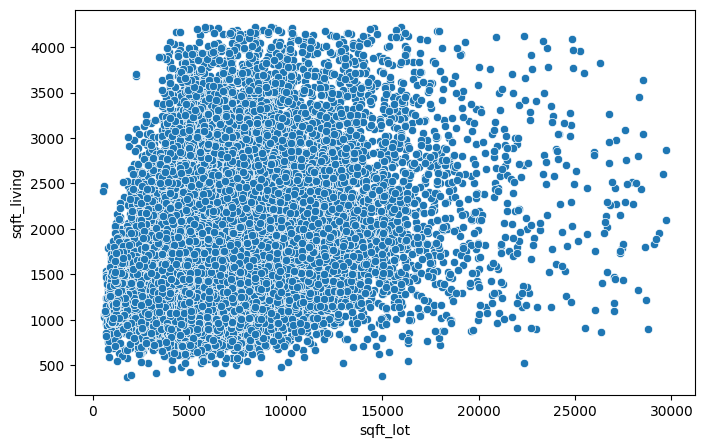

In [448]:
sns.scatterplot(data = df3, x = df3["sqft_lot"], y = df3["sqft_living"])